In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sys
import pickle

In [2]:
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')
ratings = pd.read_csv('rating.csv')

In [3]:
movies = movies.iloc[0:10000,:]

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [7]:
# CONTENT BASED

In [8]:
movies['genres']

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9995                                 Comedy|Romance
9996                          Drama|Musical|Romance
9997                                         Comedy
9998                                 Comedy|Musical
9999                                          Drama
Name: genres, Length: 10000, dtype: object

In [9]:
movies['genres'] = movies['genres'].str.replace('|', ' ')

C:\Users\MANISH~1\AppData\Local\Temp/ipykernel_2772/4181581663.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies['genres'] = movies['genres'].str.replace('|', ' ')


In [10]:
movies['genres']

0       Adventure Animation Children Comedy Fantasy
1                        Adventure Children Fantasy
2                                    Comedy Romance
3                              Comedy Drama Romance
4                                            Comedy
                           ...                     
9995                                 Comedy Romance
9996                          Drama Musical Romance
9997                                         Comedy
9998                                 Comedy Musical
9999                                          Drama
Name: genres, Length: 10000, dtype: object

In [11]:
len(movies.movieId.unique())

10000

In [12]:
len(ratings.movieId.unique())   #out of 27K movies approx 26K movies have been rated

26744

In [13]:
#removing the users who have not rated atleast 55 movies
#reducing the data 
# and quality becomes better 
ratings_f = ratings.groupby('userId').filter(lambda x: len(x)>=55)  #that have rated atleast 55 movies
movie_list_rating = ratings_f.movieId.unique().tolist()

In [14]:
# filtered movies
movies = movies[movies.movieId.isin(movie_list_rating)]

In [15]:
# after filtering we have 97% movie title
len(ratings_f.movieId.unique())/len(movies.movieId.unique()) * 100

267.1537229783827

In [16]:
#have removed 43% of the users
len(ratings_f.userId.unique())/len(ratings.userId.unique()) * 100

57.797867040211415

In [17]:
ratings_f 

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
len(movies.movieId.unique())

9992

In [20]:
#map id to title
mapping_file =dict(zip(movies.title.tolist(),movies.movieId.tolist())) 

In [21]:
mapping_file

{'Toy Story (1995)': 1,
 'Jumanji (1995)': 2,
 'Grumpier Old Men (1995)': 3,
 'Waiting to Exhale (1995)': 4,
 'Father of the Bride Part II (1995)': 5,
 'Heat (1995)': 6,
 'Sabrina (1995)': 7,
 'Tom and Huck (1995)': 8,
 'Sudden Death (1995)': 9,
 'GoldenEye (1995)': 10,
 'American President, The (1995)': 11,
 'Dracula: Dead and Loving It (1995)': 12,
 'Balto (1995)': 13,
 'Nixon (1995)': 14,
 'Cutthroat Island (1995)': 15,
 'Casino (1995)': 16,
 'Sense and Sensibility (1995)': 17,
 'Four Rooms (1995)': 18,
 'Ace Ventura: When Nature Calls (1995)': 19,
 'Money Train (1995)': 20,
 'Get Shorty (1995)': 21,
 'Copycat (1995)': 22,
 'Assassins (1995)': 23,
 'Powder (1995)': 24,
 'Leaving Las Vegas (1995)': 25,
 'Othello (1995)': 26,
 'Now and Then (1995)': 27,
 'Persuasion (1995)': 28,
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30,
 'Dangerous Minds (1995)': 31,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)':

In [22]:
tags.drop(['timestamp'],1,inplace = True)
ratings_f.drop(['timestamp'],1,inplace = True)

C:\Users\MANISH~1\AppData\Local\Temp/ipykernel_2772/4155282444.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  tags.drop(['timestamp'],1,inplace = True)
C:\Users\MANISH~1\AppData\Local\Temp/ipykernel_2772/4155282444.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  ratings_f.drop(['timestamp'],1,inplace = True)


In [23]:
#merge the movies and tags dataframe and create a metadata tag for each movie
mixed = pd.merge(movies,tags, on='movieId', how='left')
mixed.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1644.0,Watched
1,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,computer animation
2,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Disney animated feature
3,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,Pixar animation
4,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1741.0,TÃ©a Leoni does not star in this movie


In [24]:
mixed.fillna("", inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % ' '.join(x)))
Final = pd.merge(movies,mixed,on='movieId',how='left')
Final['metadata'] = Final[['tag','genres']].apply(lambda x: ' '.join(x),axis=1)
Final[['movieId','title','metadata']].head()

,movieId,title,metadata
0,1,Toy Story (1995),Watched computer animation Disney animated fea...
1,2,Jumanji (1995),time travel adapted from:book board game child...
2,3,Grumpier Old Men (1995),old people that is actually funny sequel fever...
3,4,Waiting to Exhale (1995),chick flick revenge characters chick flick cha...
4,5,Father of the Bride Part II (1995),Diane Keaton family sequel Steve Martin weddin...


In [25]:
Final.shape

(9992, 5)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix= tfidf.fit_transform(Final['metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index = Final.index.tolist())
print(tfidf_df.shape) #for each movie vector of 23k so dimensionality reduction

(9992, 16115)


In [27]:
tfidf_df.loc[0] #sparse matrix

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16110    0.0
16111    0.0
16112    0.0
16113    0.0
16114    0.0
Name: 0, Length: 16115, dtype: float64

In [28]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components =400)
latent_matrix =svd.fit_transform(tfidf_df)

In [29]:
latent_matrix

array([[ 0.0281124 ,  0.0437537 ,  0.02294602, ..., -0.00816106,
         0.01531247,  0.01511074],
       [ 0.01318877,  0.0112804 ,  0.04106896, ..., -0.03814961,
         0.02307999,  0.00400342],
       [ 0.05037864,  0.07449007,  0.00095708, ..., -0.00946882,
         0.00916756,  0.00119838],
       ...,
       [ 0.0451384 ,  0.05894892,  0.01266167, ..., -0.01482237,
        -0.00327984,  0.00285931],
       [ 0.05254539,  0.0714145 ,  0.01077473, ..., -0.00599266,
         0.00239217,  0.0132979 ],
       [ 0.1084957 , -0.06725828, -0.01813326, ..., -0.03684359,
        -0.03429627, -0.00829373]])

In [30]:
#number of latent dimensions to keep =200
n=400
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n],index=Final.title.tolist())

In [31]:
latent_matrix_1_df.shape

(9992, 400)

In [32]:
latent_matrix[0] # 200 vectors for toy story

array([ 2.81123988e-02,  4.37537043e-02,  2.29460232e-02, -7.99903445e-03,
        4.53176925e-04, -1.64974645e-02,  9.18994978e-02, -1.82960391e-02,
        2.69584915e-02, -8.22258282e-04,  4.36252063e-02, -7.57818494e-03,
       -5.03571229e-02,  1.76391779e-01,  4.95081157e-02,  1.24339125e-01,
        1.64421539e-02, -4.98265478e-02, -2.36377978e-02, -5.30291211e-03,
       -6.11676936e-02, -3.14957157e-02, -2.25241575e-01, -6.44894704e-02,
        1.48721906e-01, -1.23607546e-01, -3.96885518e-02, -1.16375914e-02,
       -1.21497216e-01,  3.28503105e-01,  3.00118863e-02,  4.84117803e-03,
        2.63205103e-02, -1.88581145e-02,  5.58462030e-03, -2.98051113e-02,
       -1.70348375e-02, -3.44944423e-03,  5.39429974e-03,  2.86450640e-02,
       -2.01312545e-02,  1.47794931e-03,  2.41761335e-02,  7.16270015e-02,
        1.50376566e-02, -1.59411417e-02,  6.72044769e-03,  3.81915820e-02,
        6.98200479e-03, -2.31735364e-02,  7.39949065e-02,  3.63156784e-02,
       -5.70459788e-03, -

In [33]:
#collaborative

In [34]:
ratings_f.head()  #gives rating for only those movies which has been watched by a user and not for all movieId

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [35]:
ratings_f1=pd.merge(movies[['movieId']],ratings_f,on='movieId',how ='left' ) #merging rating with movi id so that we have rating for each movie id for each user
#for eg. if user 1 has not watched movie 2 then rating = 0 

In [36]:
ratings_f1

,movieId,userId,rating
0,1,3,4.0
1,1,8,4.0
2,1,11,4.5
3,1,13,4.0
4,1,14,4.5
...,...,...,...
16097263,32882,135266,4.0
16097264,32890,14705,3.5
16097265,32890,58264,4.5
16097266,32890,63147,3.0


In [37]:
ratings_f2 = ratings_f1.pivot(index='movieId',columns = 'userId', values ='rating').fillna(0)

In [38]:
ratings_f2

userId,1,2,3,5,7,8,11,13,14,16,...,138474,138475,138477,138483,138484,138486,138487,138490,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,4.0,4.5,4.0,4.5,3.0,...,5.0,0.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0,3.5
2,3.5,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,4.0
3,0.0,4.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
ratings_f2.shape

(9992, 80046)

In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components =400)
latent_matrix_2 =svd.fit_transform(ratings_f2)
latent_matrix_2_df=pd.DataFrame(latent_matrix_2, index =Final.title.tolist())

In [41]:
latent_matrix_2_df.shape

(9992, 400)

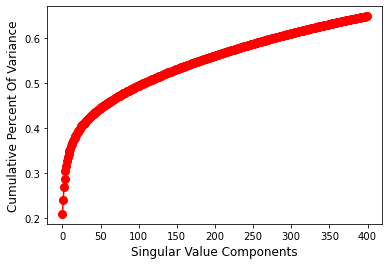

In [42]:
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained,'.-',ms=16,color='red')
plt.xlabel("Singular Value Components", fontsize =12)
plt.ylabel("Cumulative Percent Of Variance", fontsize = 12)
plt.show()

In [43]:
with open('l1.pickle', 'wb') as f:
    pickle.dump(latent_matrix_1_df, f)

In [44]:
with open('l2.pickle', 'wb') as f:
    pickle.dump(latent_matrix_2_df, f)

In [45]:
pickle_in = open("l2.pickle","rb")
latent_matrix_2_df = pickle.load(pickle_in)

In [46]:
pickle_in = open("l1.pickle","rb")
latent_matrix_1_df = pickle.load(pickle_in)

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
a_1 = np.array(latent_matrix_1_df.loc['Hulk (2003)']).reshape(1,-1)
a_2 = np.array(latent_matrix_2_df.loc['Hulk (2003)']).reshape(1,-1)
#calculate similarity for this movie with other movies
score_1 = cosine_similarity(latent_matrix_1_df,a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df,a_2).reshape(-1)
#avg of both content and collaborative 
hybrid = ((score_1+score_2)/2.0)

dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid':hybrid}
similar = pd.DataFrame(dictDf,index=latent_matrix_1_df.index)
similar.sort_values('hybrid',ascending = False, inplace = True)
similar[1:].head(11)

,content,collaborative,hybrid
Hellboy (2004),0.678764,0.897103,0.787934
Elektra (2005),0.793600,0.774581,0.784091
Daredevil (2003),0.622743,0.941055,0.781899
X2: X-Men United (2003),0.846533,0.712782,0.779657
"Punisher, The (2004)",0.733230,0.791911,0.762570
Spider-Man 2 (2004),0.808036,0.661402,0.734719
Spider-Man (2002),0.831221,0.617626,0.724423
X-Men (2000),0.853032,0.552205,0.702618
Spawn (1997),0.845816,0.536758,0.691287
Catwoman (2004),0.623933,0.751145,0.687539


In [ ]:
# based on hybrid approach the top 10 movies similar to Toy story are :
# Monsters, Inc. (2001)
#Finding Nemo (2003)	
#Bug's Life, A (1998)	
#Incredibles, The (2004)
#Antz (1998)
#Ice Age (2002)	
#Toy Story 3 (2010)
#Up (2009)
#La Luna (2011)

In [ ]:
def predict(movie):
    a_1 = np.array(latent_matrix_1_df.loc[movie]).reshape(1,-1)
    a_2 = np.array(latent_matrix_2_df.loc[movie]).reshape(1,-1)
    #calculate similarity for this movie with other movies
    score_1 = cosine_similarity(latent_matrix_1_df,a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df,a_2).reshape(-1)
    #avg of both content and collaborative 
    hybrid = ((score_1+score_2)/2.0)

    dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid':hybrid}
    similar = pd.DataFrame(dictDf,index=latent_matrix_1_df.index)
    similar.sort_values('hybrid',ascending = False, inplace = True)
    return similar[1:].head(11)

In [ ]:
predict('Toy Story (1995)')

In [ ]:
latent_matrix_1_df